In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Titanic-Dataset.csv")

print("Basic Dataset Information")
print("--------------------------")
print("Numberof Rows    :", df.shape[0])
print("Numberof Columns :", df.shape[1])
print("\nMissing Values per Column:")
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

irrelevant_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=irrelevant_cols, inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treat outliers by capping
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Label encoding for remaining categorical columns
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X= df.drop('Survived', axis=1)
y = df['Survived']
# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("\nDatasetSplit Shapes")
print("---------------------")
print("TrainingSet   :", X_train.shape,y_train.shape)
print("ValidationSet :", X_val.shape,y_val.shape)
print("testingSet    :", X_test.shape,y_test.shape)

print("\nData after preprocessing:")
print(df.head())

Basic Dataset Information
--------------------------
Numberof Rows    : 891
Numberof Columns : 12

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

DatasetSplit Shapes
---------------------
TrainingSet   : (623, 8) (623,)
ValidationSet : (134, 8) (134,)
testingSet    : (134, 8) (134,)

Data after preprocessing:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  65.6344     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1   

Original Dataset Shape: (891, 12)
Median Age (Median Imputation): 28.0
Mean Age (KNN Imputation): 29.69911764705882
Original size: (891, 12)
After capping: (891, 12)
After removal: (825, 12)
   PassengerId  Survived    Pclass  \
0    -1.730108 -0.789272  0.827377   
1    -1.726220  1.266990 -1.566107   
2    -1.722332  1.266990  0.827377   
3    -1.718444  1.266990 -1.566107   
4    -1.714556 -0.789272  0.827377   

                                                Name     Sex       Age  \
0                            Braund, Mr. Owen Harris    male -0.611917   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.715304   
2                             Heikkinen, Miss. Laina  female -0.280111   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.466450   
4                           Allen, Mr. William Henry    male  0.466450   

      SibSp     Parch            Ticket      Fare Cabin Embarked  
0  0.432793 -0.473674         A/5 21171 -0.502445   NaN        S  
1

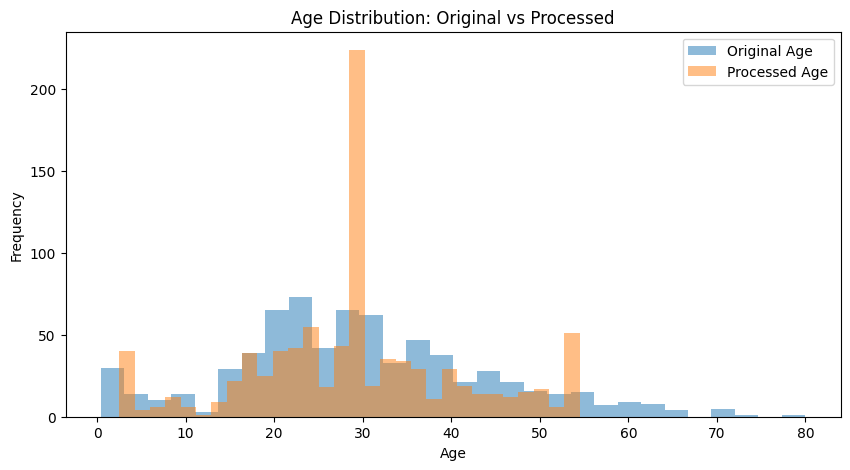

In [4]:
# ===== DATA PREPROCESSING PIPELINE (ALL IN ONE CODE) =====

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# 1
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Titanic-Dataset.csv")   # Ensure 'Age' column exists
print("Original Dataset Shape:", df.shape)

df_median = df.copy()
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

df_knn = df.copy()
knn = KNNImputer(n_neighbors=5)
df_knn[['Age']] = knn.fit_transform(df_knn[['Age']])
print("Median Age (Median Imputation):", df_median['Age'].median())
print("Mean Age (KNN Imputation):", df_knn['Age'].mean())

# 2
Q1 = df_knn['Age'].quantile(0.25)
Q3 = df_knn['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_capped = df_knn.copy()
df_capped['Age'] = np.where(df_capped['Age'] < lower, lower,
                     np.where(df_capped['Age'] > upper, upper, df_capped['Age']))

df_removed = df_knn[(df_knn['Age'] >= lower) & (df_knn['Age'] <= upper)]
print("Original size:", df_knn.shape)
print("After capping:", df_capped.shape)
print("After removal:", df_removed.shape)

# 3
scaler = StandardScaler()
num_cols = df_capped.select_dtypes(include=np.number).columns

df_scaled = df_capped.copy()
df_scaled[num_cols] = scaler.fit_transform(df_capped[num_cols])
print(df_scaled.head())


# 4
df_median.to_csv("median_imputed.csv", index=False)
df_knn.to_csv("knn_imputed.csv", index=False)
df_capped.to_csv("outlier_capped.csv", index=False)
df_scaled.to_csv("scaled_data.csv", index=False)

print("Preprocessed datasets saved successfully!")


# 5
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=30, alpha=0.5, label="Original Age")
plt.hist(df_capped['Age'], bins=30, alpha=0.5, label="Processed Age")

plt.title("Age Distribution: Original vs Processed")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


